# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


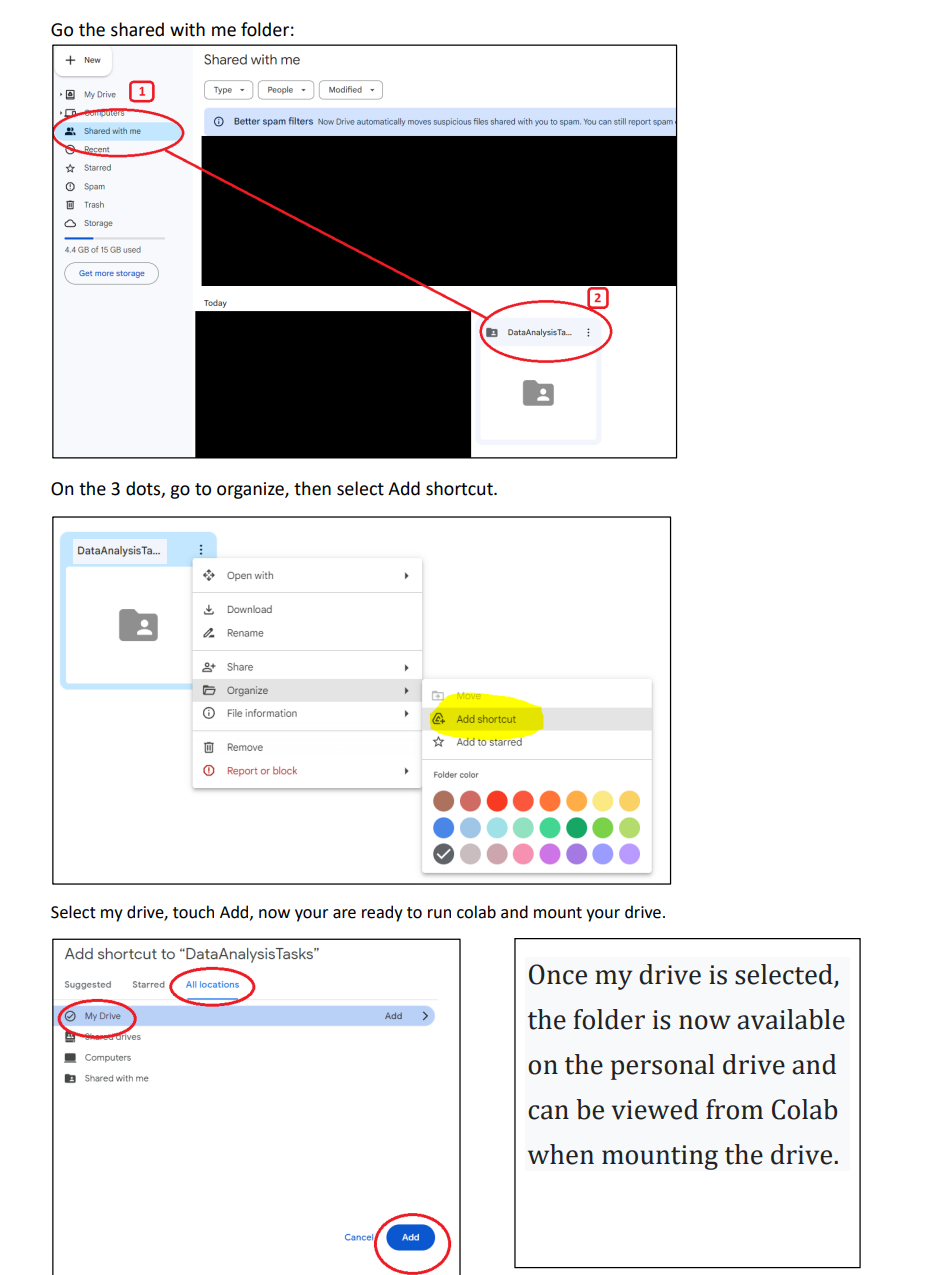

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








**Prompt**:

If I provide you with data about traffic congestions, can plot an interactive Scatter diagram for Vehicles over DateTime

In [5]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
import pandas as pd

# Create a DataFrame representing traffic congestions
data = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/traffic_congestion.csv")

df = pd.DataFrame(data)

# Convert 'DateTime' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create a color map based on the 'Junction' column
junctions = df['Junction'].unique()
color_map = linear_cmap(field_name='Junction', palette=Spectral6,
                        low=min(junctions), high=max(junctions))

# Create a Bokeh figure
fig = figure(title="Scatter Plot: Vehicles vs DateTime", x_axis_type="datetime",
             x_axis_label="DateTime", y_axis_label="Vehicles")

# Add scatter points to the plot
fig.scatter(x='DateTime', y='Vehicles', size=5, source=source,
            legend_field='Junction', fill_color=color_map)

# Add legend title
fig.legend.title = "Junction"

# Add HoverTool
hover = HoverTool(
    tooltips=[("DateTime", "@DateTime{%F %T}"), ("Junction", "@Junction"),("Vehicles", "@Vehicles")],
    formatters={'@DateTime': 'datetime'}
)
fig.add_tools(hover)

# Show the plot
output_notebook()
show(fig)